![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [29]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#INITIALIZING THE DATA

workout = pd.read_csv("data/workout.csv")
three_keywords = pd.read_csv("data/three_keywords.csv")
workout_geo = pd.read_csv("data/workout_geo.csv", index_col=0)
three_keywords_geo = pd.read_csv("data/workout_geo.csv")

#REVIEW OF THE DATA

print("----------------------------------------------------------------------")
print("WORKOUT WORLDWIDE")
print(workout.head())
print("----------------------------------------------------------------------")
print("WORKOUT GYM/ HOME")
print(three_keywords.head())
print("----------------------------------------------------------------------")
print("WORKOUT PLACES")
print(workout_geo.head())
print("----------------------------------------------------------------------")
print("WORKOUT GYM/ HOME/ TIME")   
print(three_keywords_geo.head())

print(workout.info)


----------------------------------------------------------------------
WORKOUT WORLDWIDE
     month  workout_worldwide
0  2018-03                 59
1  2018-04                 61
2  2018-05                 57
3  2018-06                 56
4  2018-07                 51
----------------------------------------------------------------------
WORKOUT GYM/ HOME
     month  home_workout_worldwide  gym_workout_worldwide  home_gym_worldwide
0  2018-03                      12                     16                  10
1  2018-04                      12                     18                  10
2  2018-05                      13                     16                   9
3  2018-06                      12                     17                   9
4  2018-07                      12                     17                   9
----------------------------------------------------------------------
WORKOUT PLACES
                                   workout_2018_2023
country                            

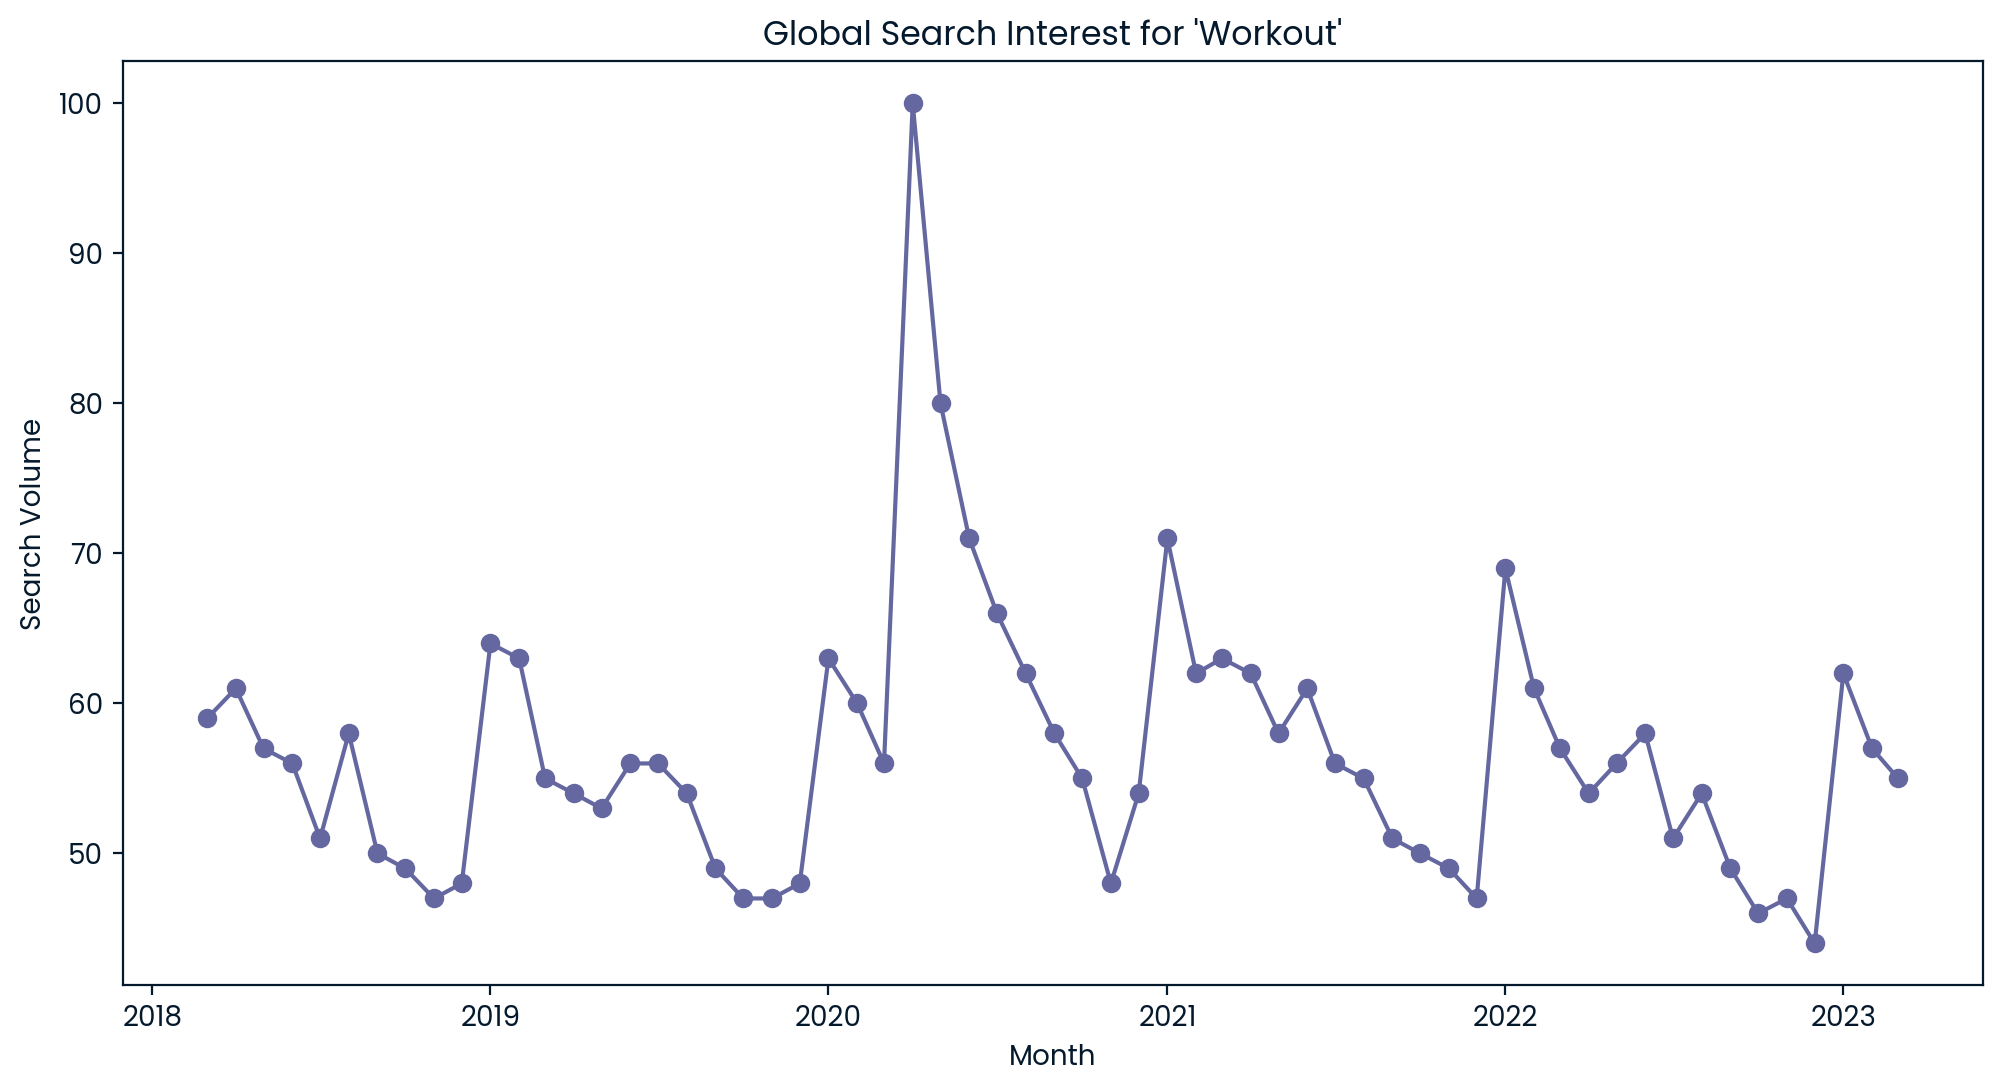

In [31]:
#TRANSFORM IN DATETIME AND EXTRACT DATA

workout["month"] =  pd.to_datetime(workout["month"], format='%Y-%m-%d')
workout["weekdays"] = workout["month"].dt.weekday
workout["year"] = workout["month"].dt.year
workout["week"] = workout["month"].dt.week
peak_index = workout["workout_worldwide"].idxmax()

year_str = str(workout.loc[peak_index, "year"])

# VIZ
plt.figure(figsize=(12, 6))
plt.plot(workout["month"], workout["workout_worldwide"], marker="o", linestyle="-")
plt.title("Global Search Interest for 'Workout'")
plt.xlabel("Month")
plt.ylabel("Search Volume")
plt.show()


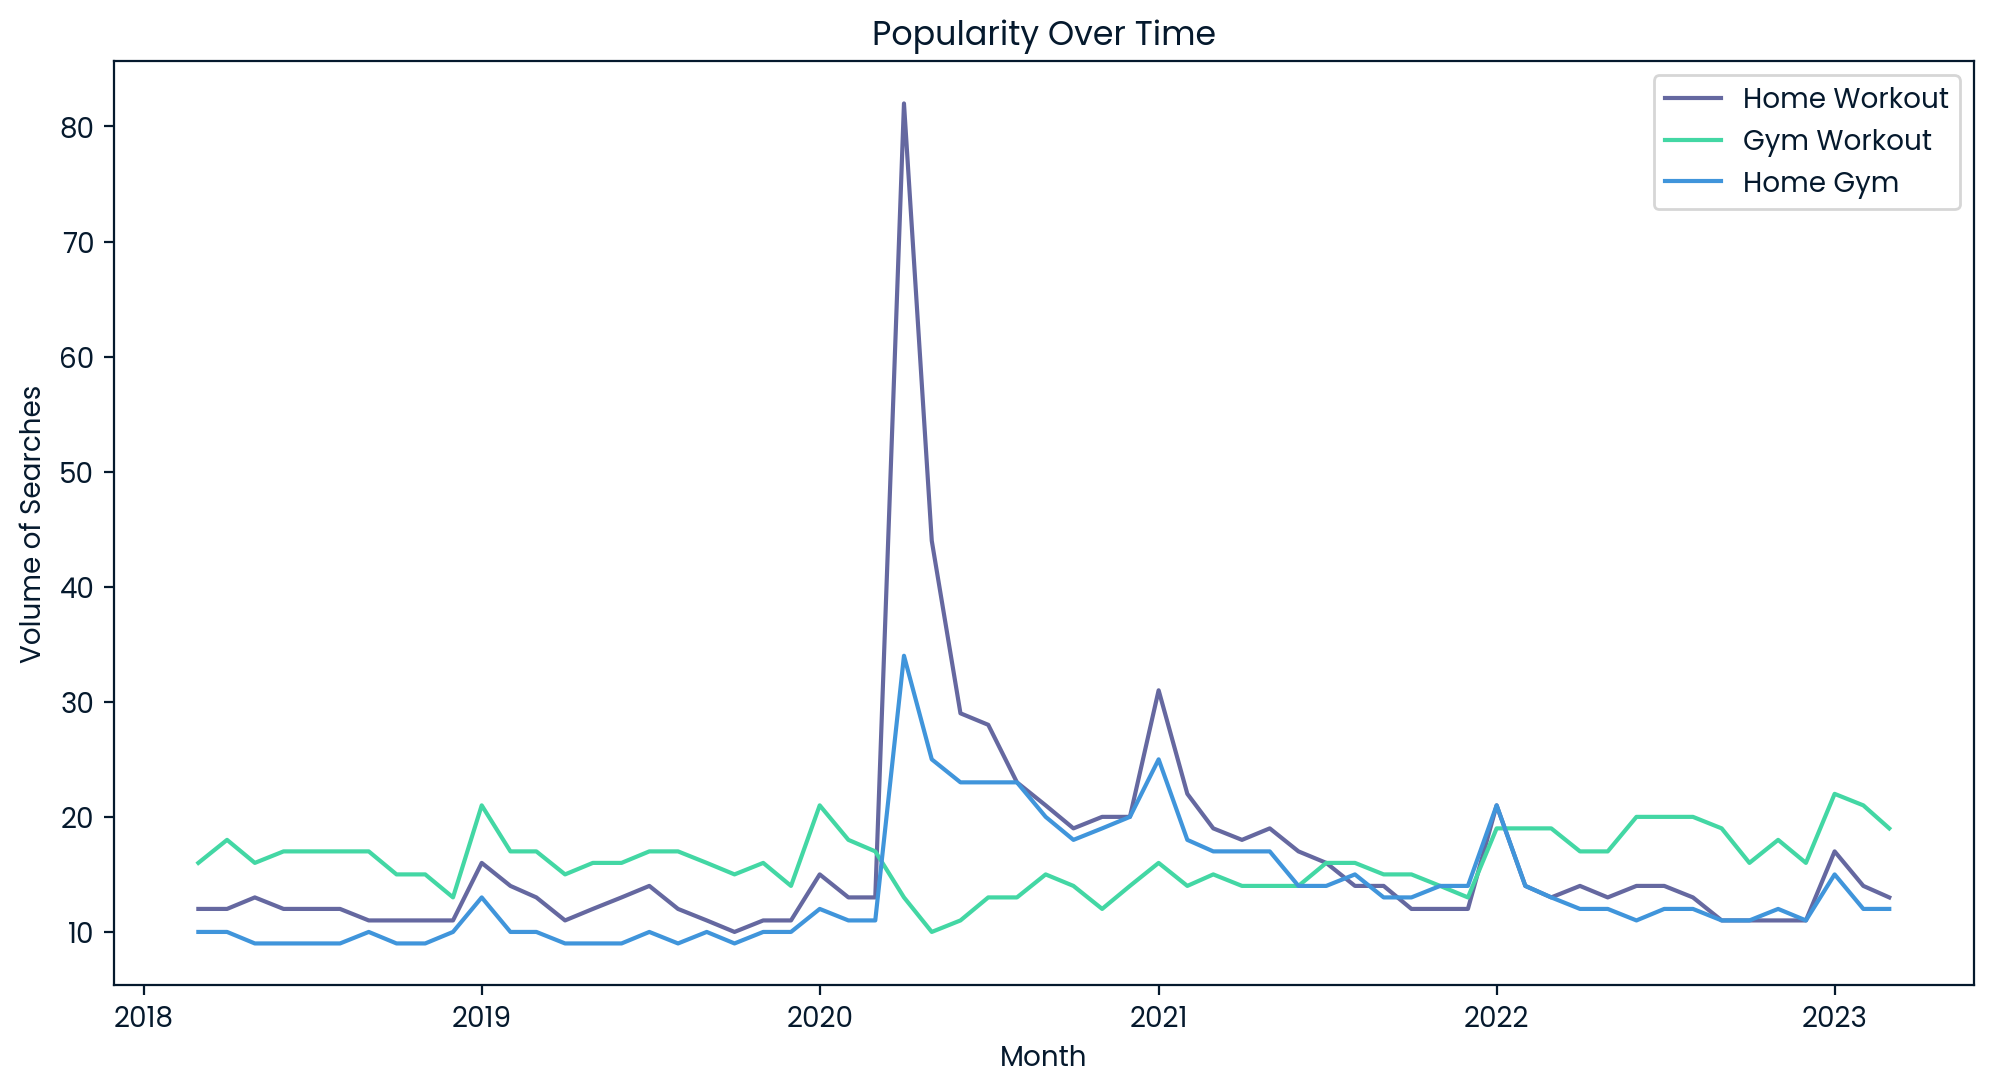

In [32]:
#print(three_keywords.dtypes) # A OBJECT AS MONTH

# TRANSFORMING IN DATATIME
three_keywords["month"] =  pd.to_datetime(three_keywords["month"], format='%Y-%m-%d')


# VIZ 
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(three_keywords["month"], three_keywords["home_workout_worldwide"], label="Home Workout")
ax.plot(three_keywords["month"], three_keywords["gym_workout_worldwide"], label="Gym Workout")
ax.plot(three_keywords["month"], three_keywords["home_gym_worldwide"], label="Home Gym")


ax.set_xlabel("Month")
ax.set_ylabel("Volume of Searches")
ax.set_title("Popularity Over Time")
ax.legend()

plt.show()

peak_covid = "home_workout_worldwide"
current = "gym_workout_worldwide"


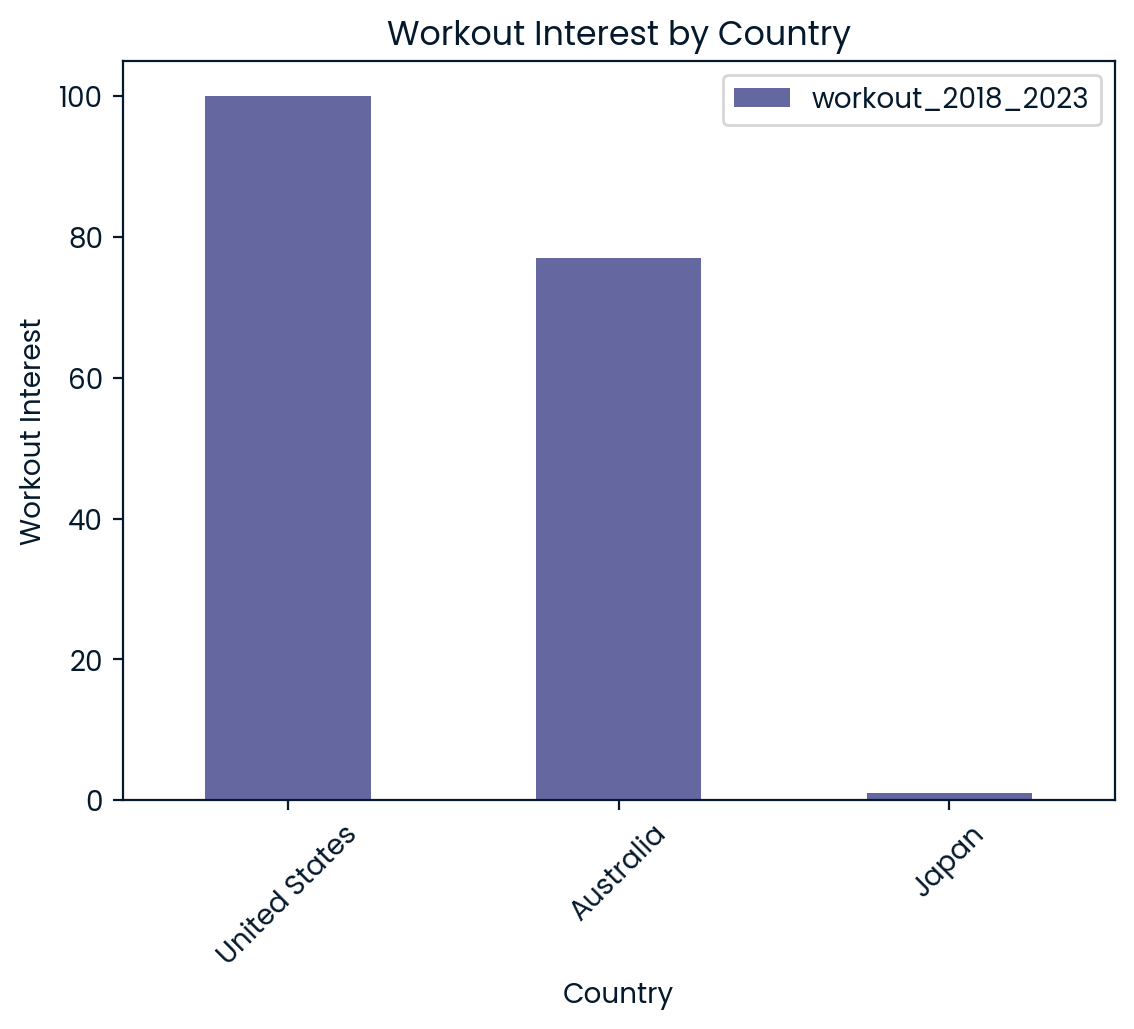

United States


In [33]:

# CLEANING AND SEARCHING
workout_geo_cleaned = workout_geo.dropna(subset=["workout_2018_2023"])
list_workout = ["United States", "Australia", "Japan"]

top_country = workout_geo_cleaned.loc[workout_geo_cleaned.index.isin(list_workout)]


# VIZ
top_country.plot(kind="bar", y="workout_2018_2023")

plt.xlabel("Country")
plt.ylabel("Workout Interest")
plt.title("Workout Interest by Country")
plt.xticks(rotation=45) 

plt.show()

top_country = top_country["workout_2018_2023"].sum(level=0).idxmax()

print(top_country)

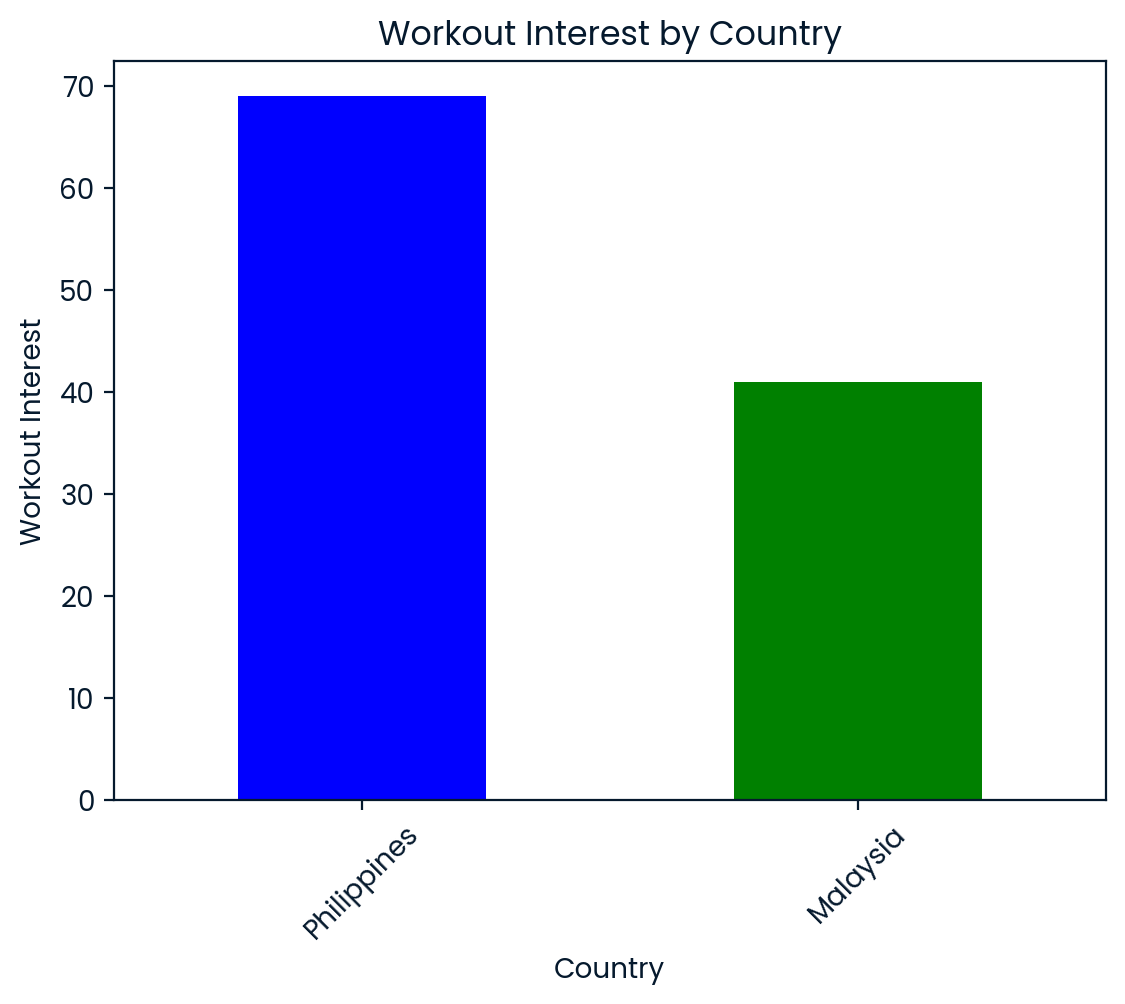

Philippines


In [34]:
import matplotlib.pyplot as plt

# CLEANING DATA
three_keywords_geo_cleaned = three_keywords_geo.dropna(subset=["workout_2018_2023"])

# FILTER ONLY PHILI AND MALASYA
filtered = three_keywords_geo_cleaned[three_keywords_geo_cleaned["country"].isin(["Philippines", "Malaysia"])]

# FREQUENCY
home_workout_geo = filtered.groupby("country")["workout_2018_2023"].sum().idxmax()

# BAR
filtered.set_index("country")["workout_2018_2023"].plot(kind="bar", color=["blue", "green"])

plt.xlabel("Country")
plt.ylabel("Workout Interest")
plt.title("Workout Interest by Country")
plt.xticks(rotation=45) 

plt.show()

print(home_workout_geo)
